<a href="https://colab.research.google.com/github/tashir0605/Cocepts-And-Practice/blob/main/LLM_from_Scratch/Copy_Vector_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Summary: How Weights of the Embedding Layer Work in GPT

## 🔹 1. Vocabulary and Embedding Matrix

**Vocabulary size:**

$$
V = 50,257 \quad \text{(e.g., GPT-2)}
$$

**Embedding dimension:**

$$
d = 768 \quad \text{(in GPT-2 small)}
$$

**Embedding matrix:**

$$
E \in \mathbb{R}^{V \times d}
$$

Each row \( E[i] \) is a 768-dimensional vector representing token \( i \).

These vectors are **randomly initialized** at the start of training.

---


---
### ✅ Explanation:

- The matrix \( E \) holds a learnable vector for each token in the vocabulary.
- During training, these vectors are updated through backpropagation.
- When a token index \( i \) is input, the model looks up \( E[i] \), a vector of size 768.
- This vector becomes the input to the transformer layers.

---


## 🔹 2. During Training (Forward Pass)

### 📌 Example Input:

```text
"I love machine learning"
→ tokens = [101, 222, 390, 8123]
```

---

### ✅ Step 1: Embedding Lookup

We extract embeddings for each token ID from the embedding matrix $E$:

$$
X = [E[101], E[222], E[390], E[8123]] \in \mathbb{R}^{4 \times 768}
$$

This embedding sequence $X$ is passed into the Transformer.

---

### ✅ Step 2: Transformer Output

Assume we want to predict the next word after `"machine"`.

Then the final hidden state output from the Transformer is:

$$
h \in \mathbb{R}^{768}
$$

---

### ✅ Step 3: Compute Logits

We define a learnable output weight matrix:

$$
W_{\text{out}} \in \mathbb{R}^{768 \times 50257}
$$

To project the hidden state to vocabulary scores:

$$
\text{logits} = h \cdot W_{\text{out}} + b \in \mathbb{R}^{50257}
$$

Each element $\text{logits}[i]$ is a **raw score** (called a logit) for token $i$ in the vocabulary.

---

### ✅ Step 4: Softmax to Get Probabilities

Convert logits to probabilities using softmax:

$$
\hat{y}_i = \frac{e^{\text{logits}_i}}{\sum_{j=1}^{V} e^{\text{logits}_j}} \in \mathbb{R}^{50257}
$$

Where $\hat{y}_i$ is the predicted probability for token $i$.

---

### ✅ Step 5: Cross-Entropy Loss

If the correct next token is at index $y = 8123$, the loss is:

$$
\mathcal{L} = -\log(\hat{y}_{8123})
$$

This penalizes the model for not assigning high probability to the correct token.

---

### ✅ Step 6: Backpropagation

During backpropagation, the model updates:

- The output matrix $W_{\text{out}}$
- All Transformer weights
- The embedding matrix $E$

Update rule for the embedding of token $t$:

$$
E[t] \leftarrow E[t] - \eta \cdot \nabla_{E[t]} \mathcal{L}
$$

Where $\eta$ is the learning rate.

---

### 🔁 Over Time (Learning Word Similarity)

As the model trains on examples like:

```text
I love pizza  
I enjoy burgers  
I love learning  
I like math
```

The embeddings for similar-context words start to align:

$$
E[\text{"love"}] \approx E[\text{"like"}] \approx E[\text{"enjoy"}]
$$

→ Words used in similar contexts get similar vector representations.


## ✅ Final Recap Table

| Step | Description                                                                 |
|------|------------------------------------------------------------------------------|
| 1    | Embedding matrix \( E \in \mathbb{R}^{V \times d} \) initialized randomly   |
| 2    | Input tokens → embedded into vectors via lookup in \( E \)                  |
| 3    | Final hidden state \( h \in \mathbb{R}^d \) → projected to logits \( \in \mathbb{R}^V \) |
| 4    | Softmax converts logits to probabilities                                    |
| 5    | Cross-entropy compares prediction with true next token                      |
| 6    | Backpropagation updates \( E \), \( W_{\text{out}} \), and all other weights |


In [ ]:
#pip install gensim

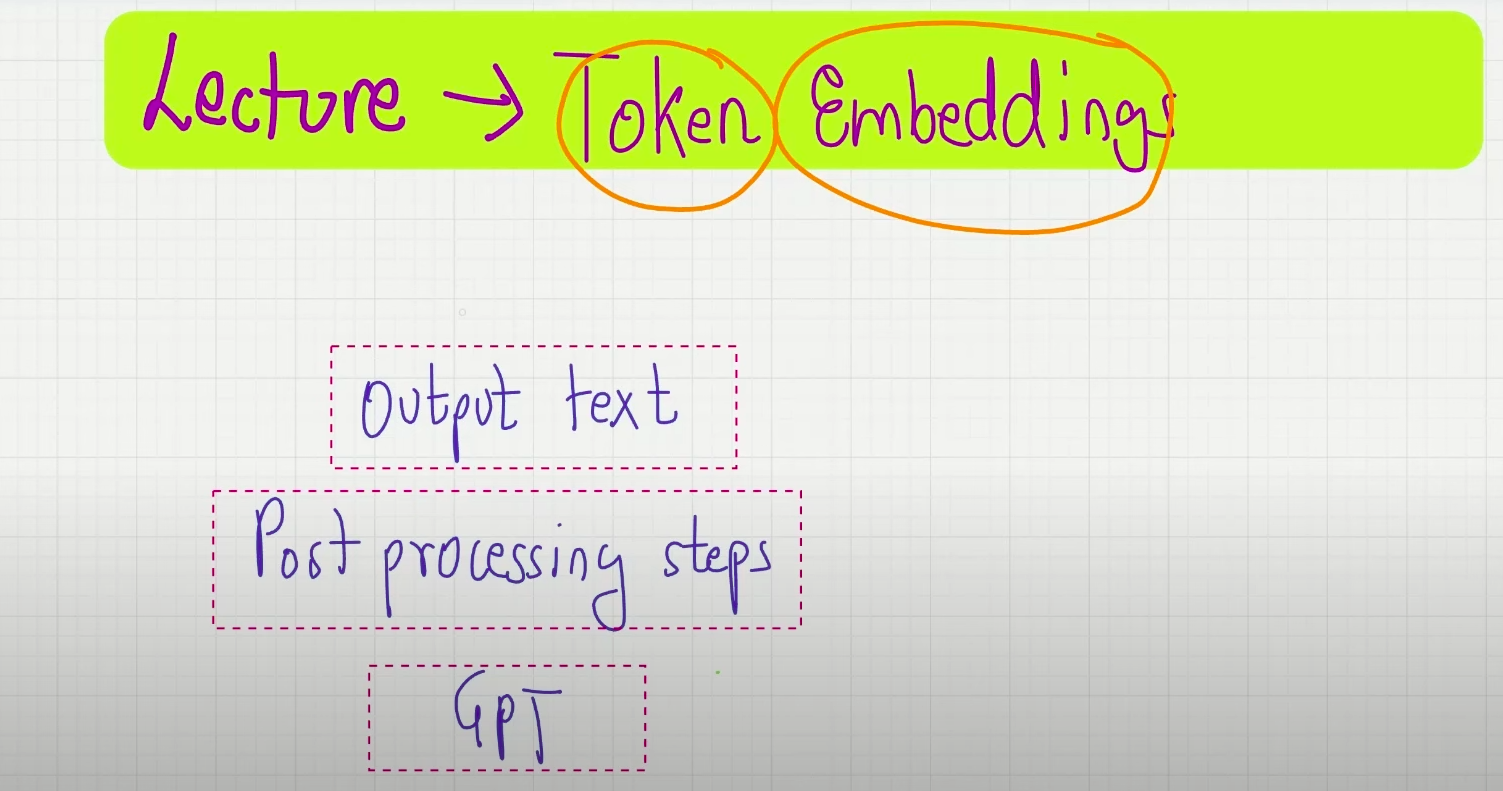

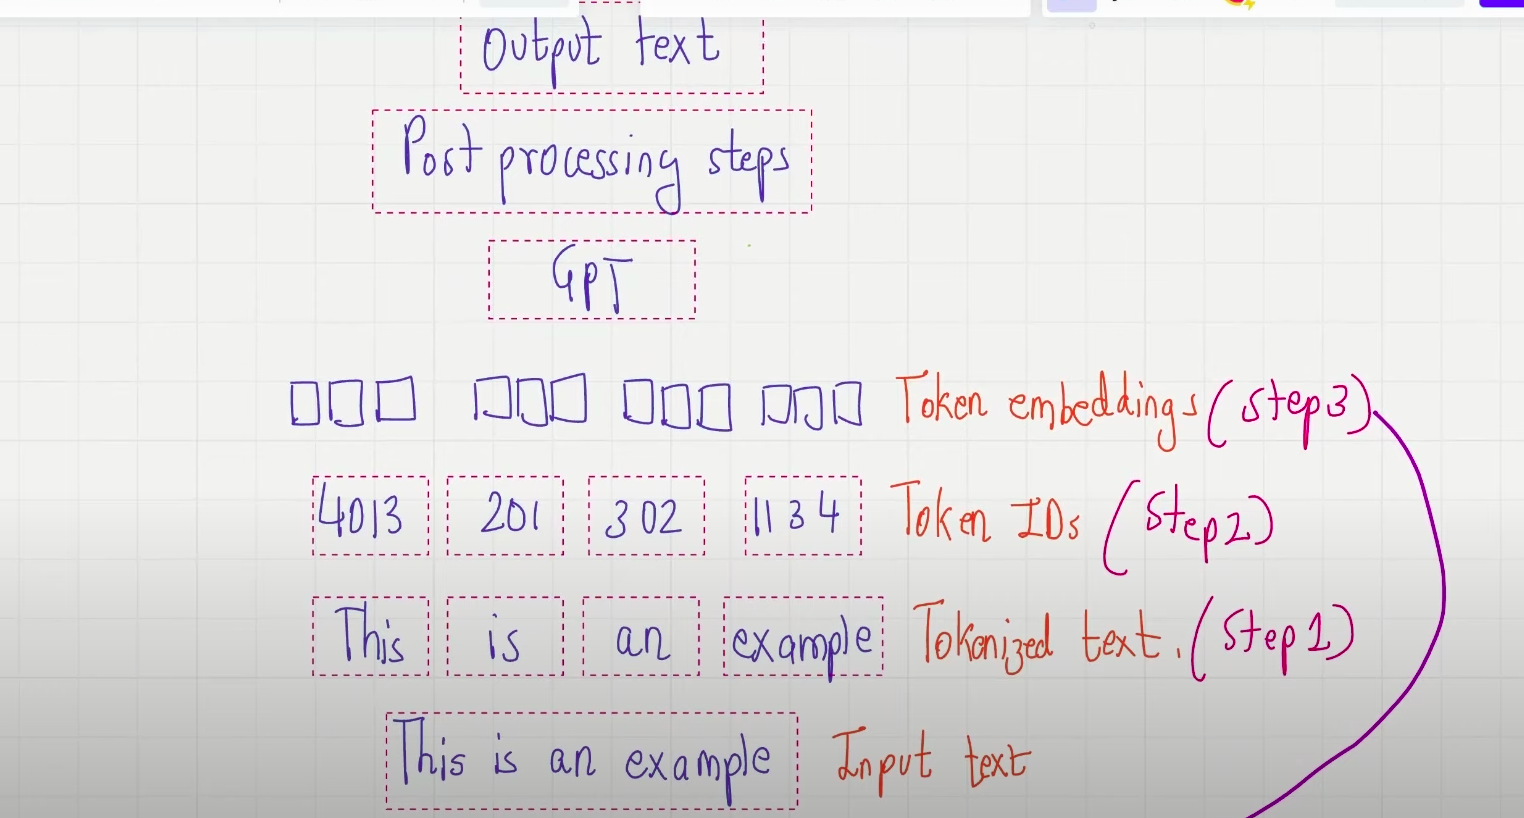

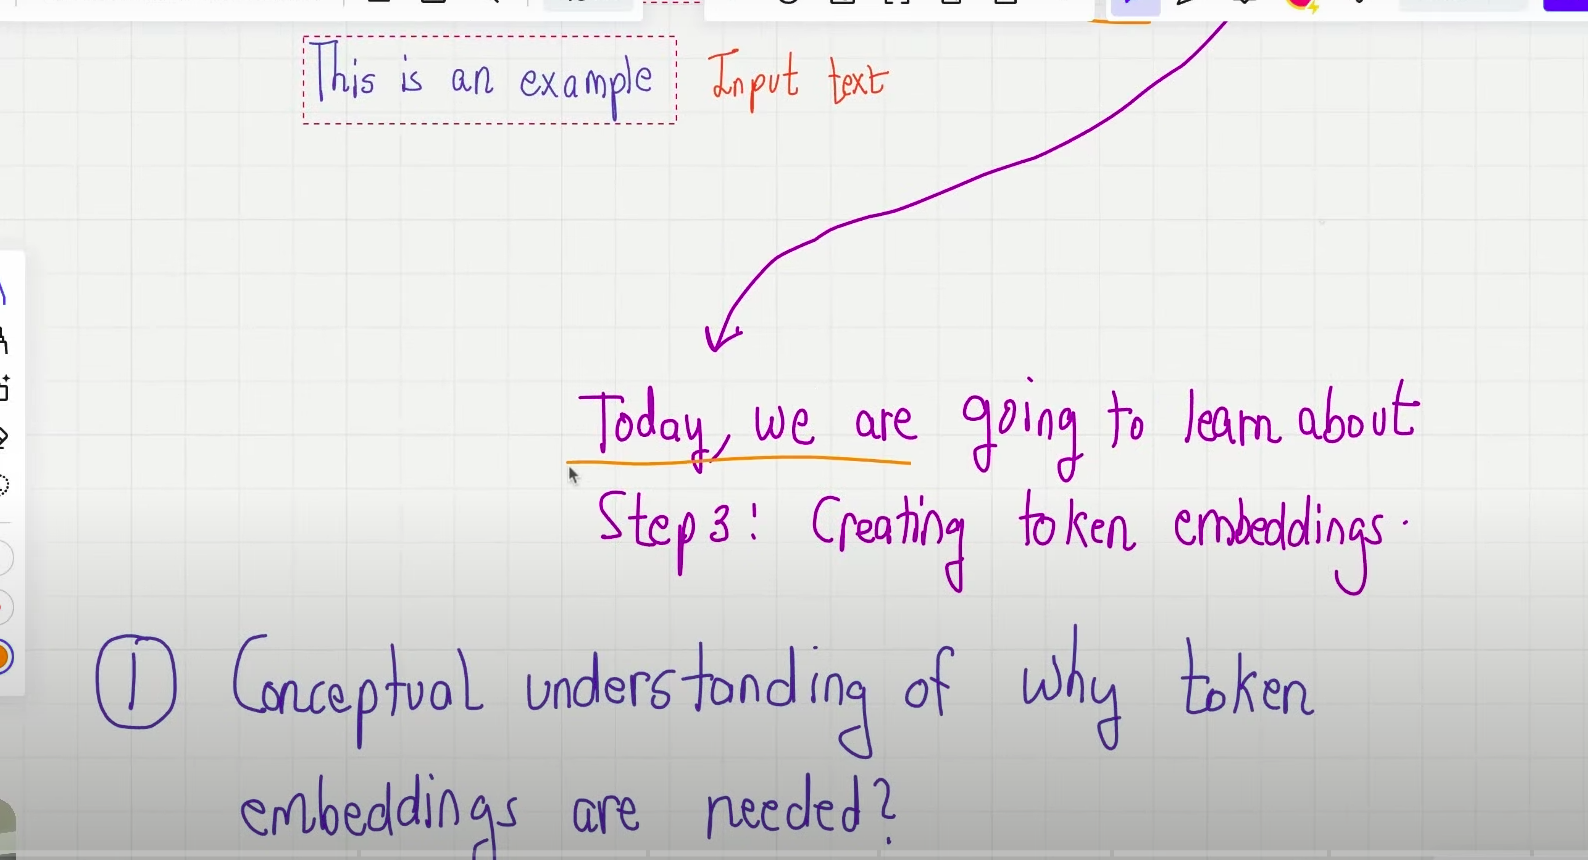

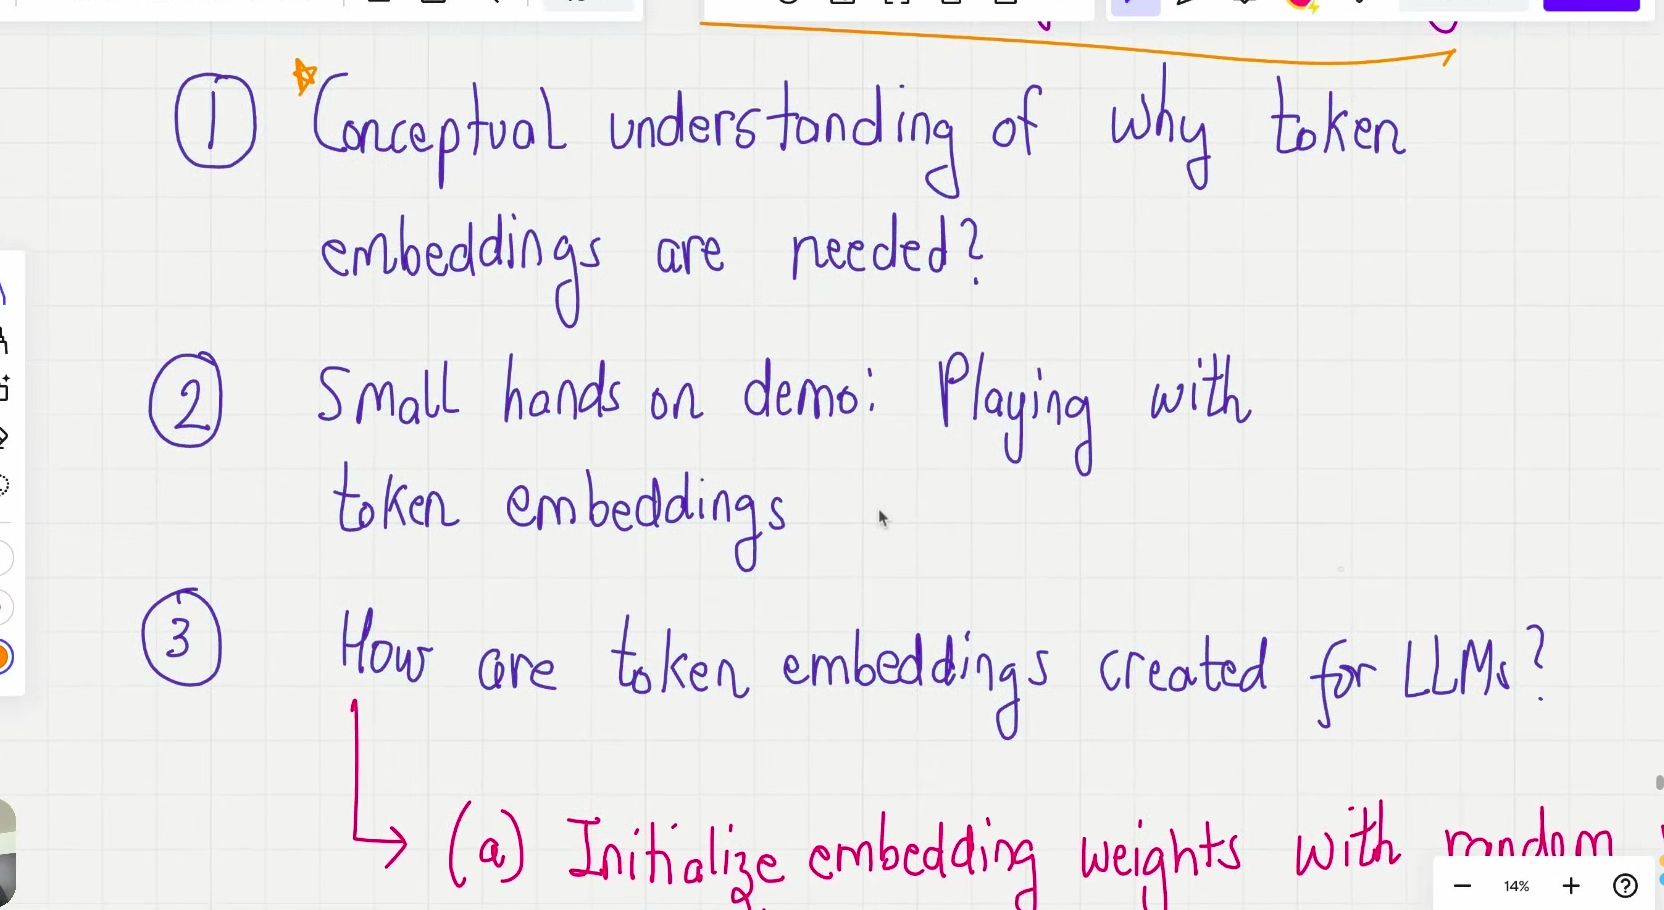

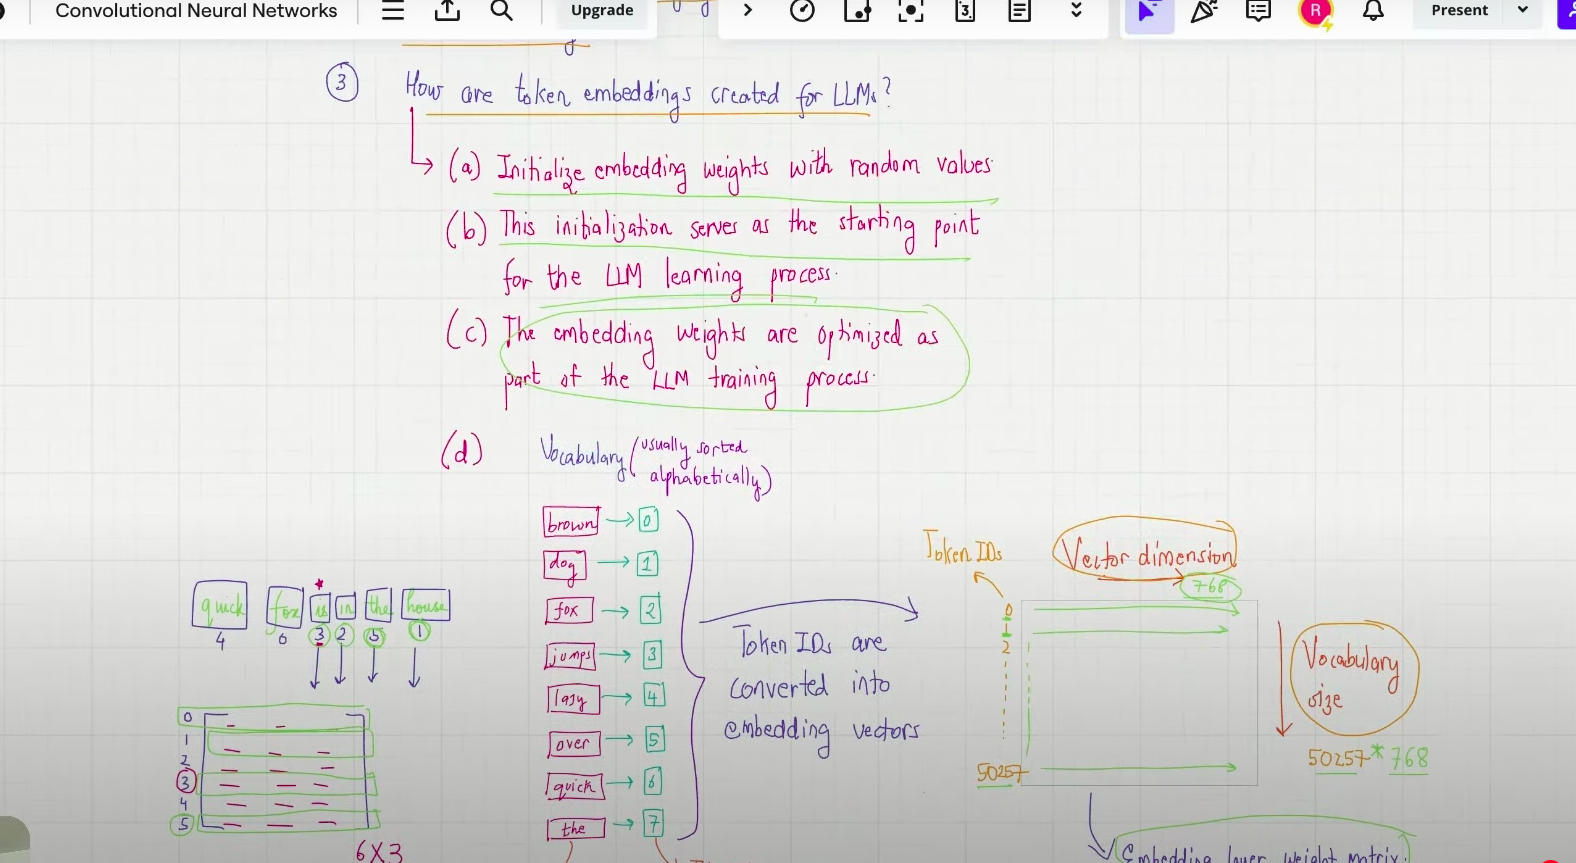

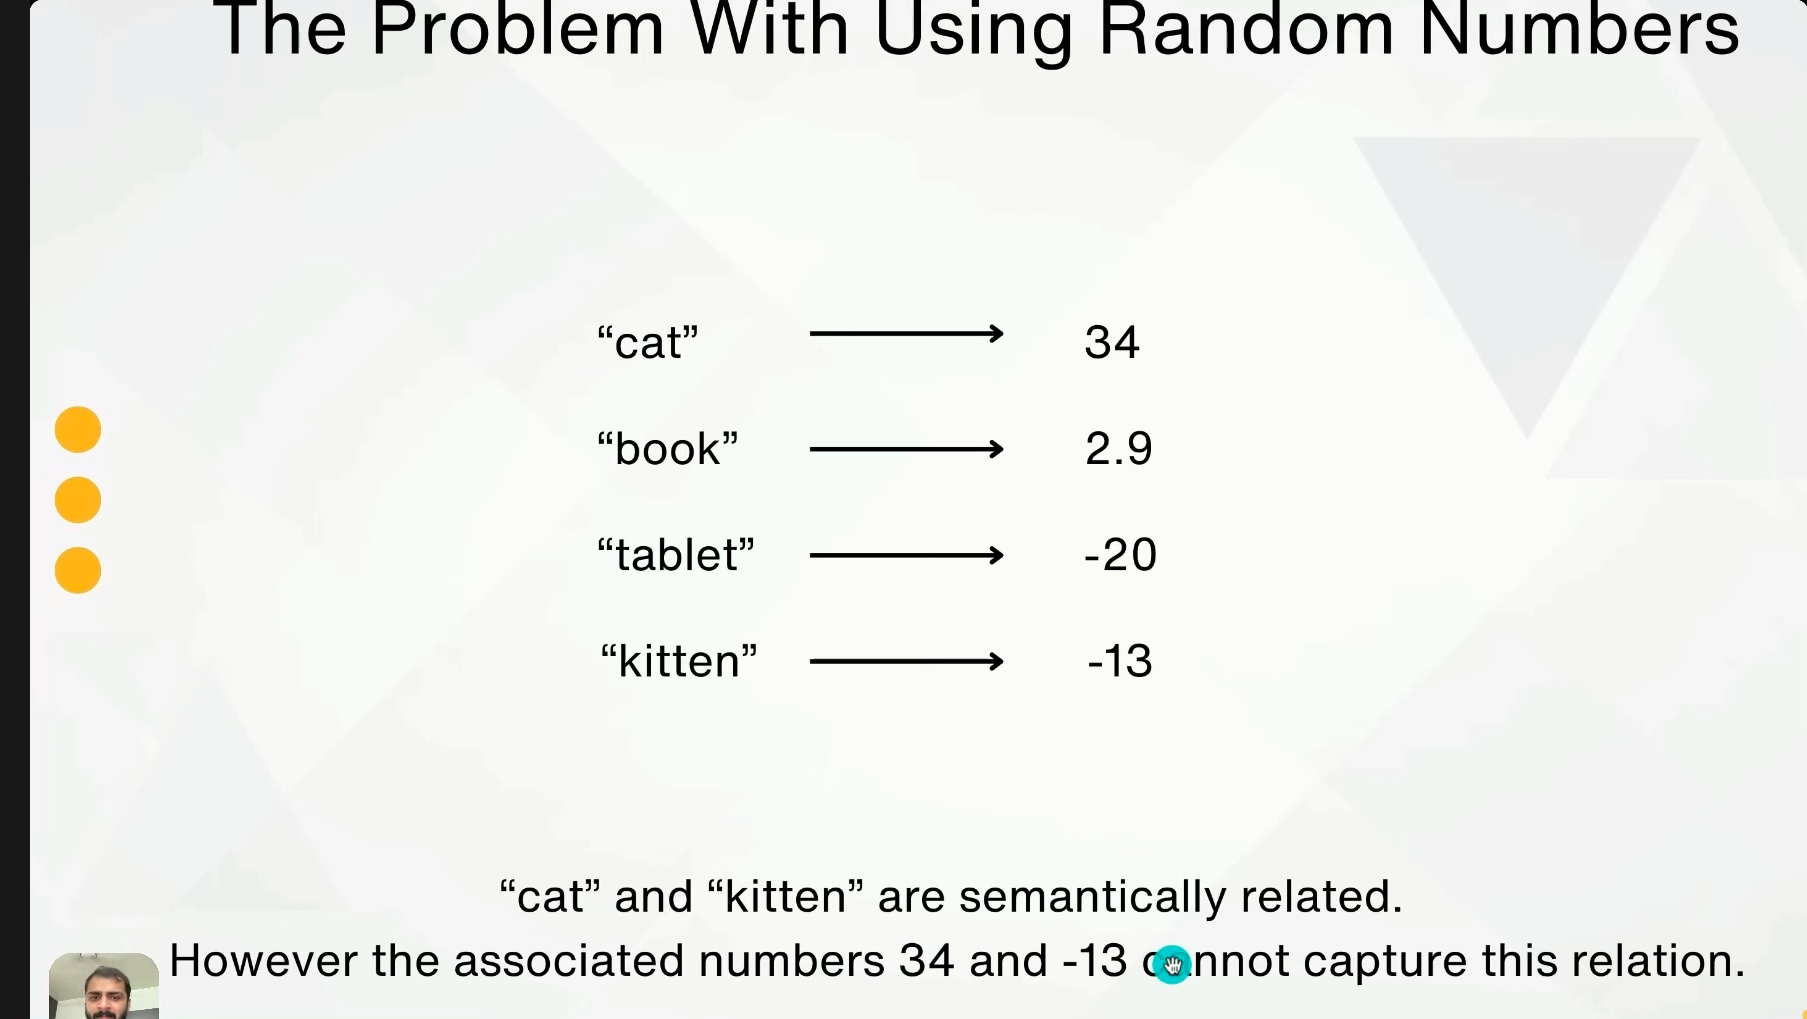

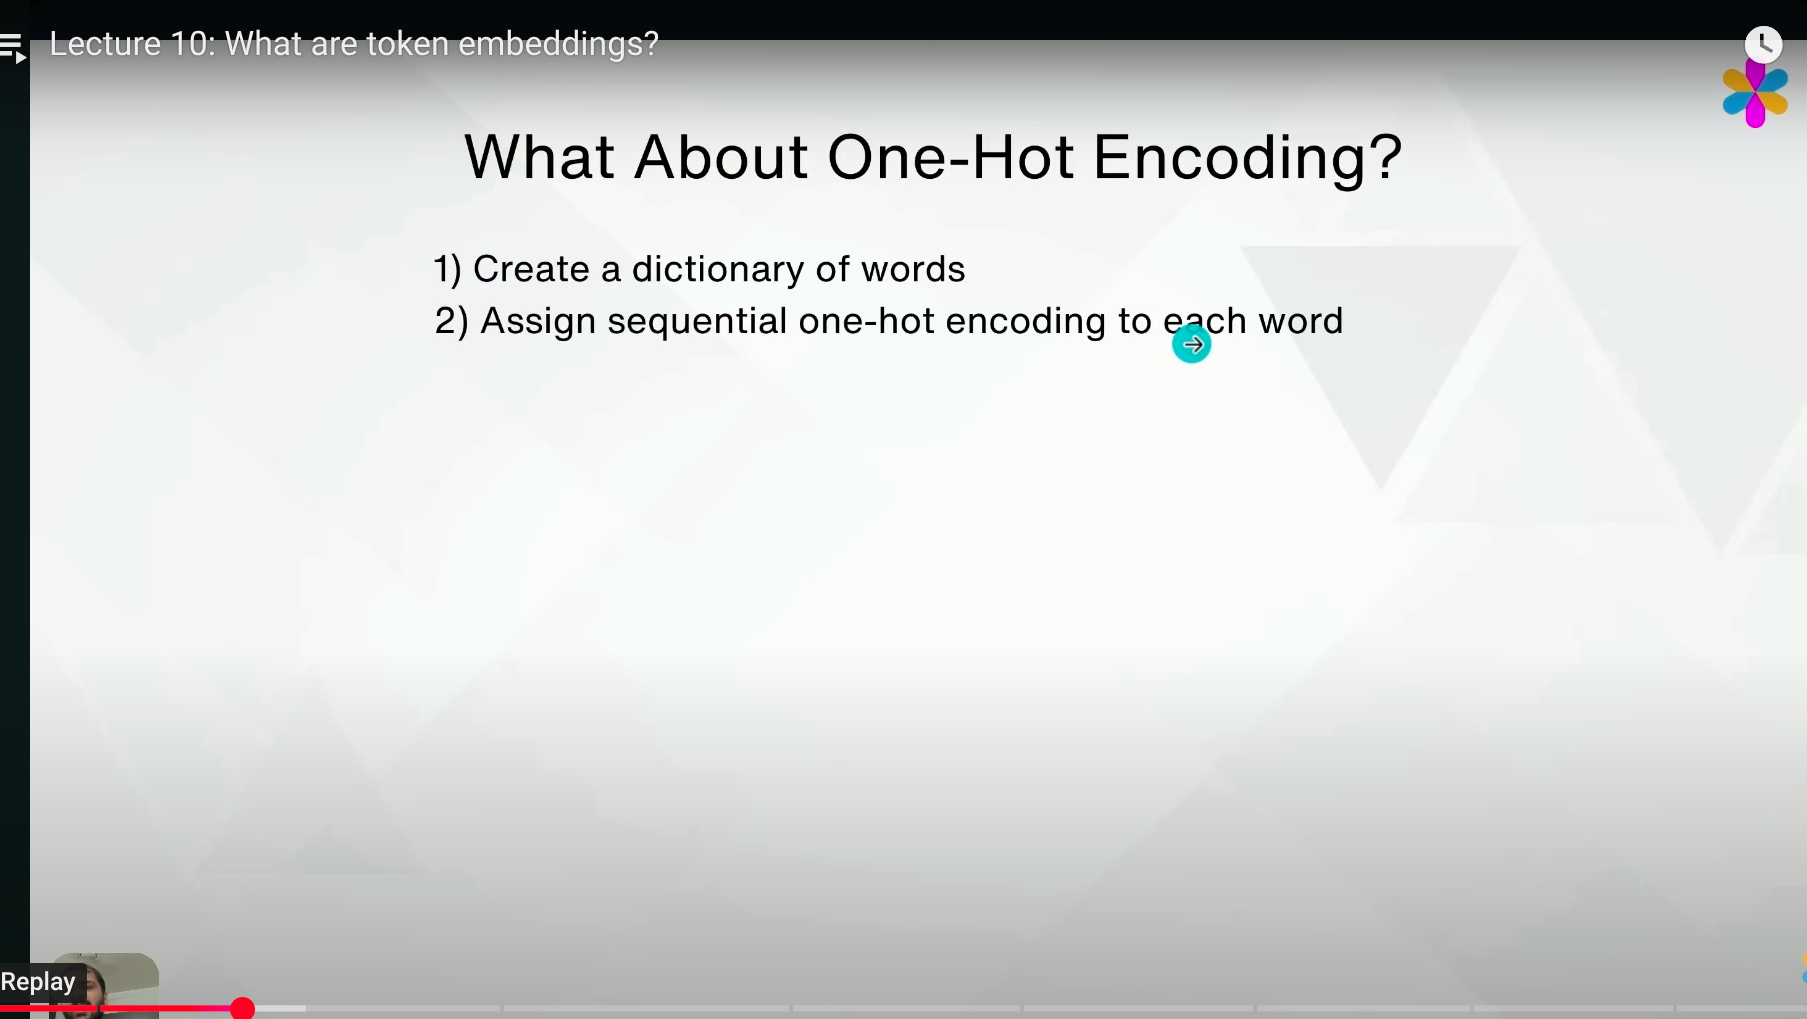

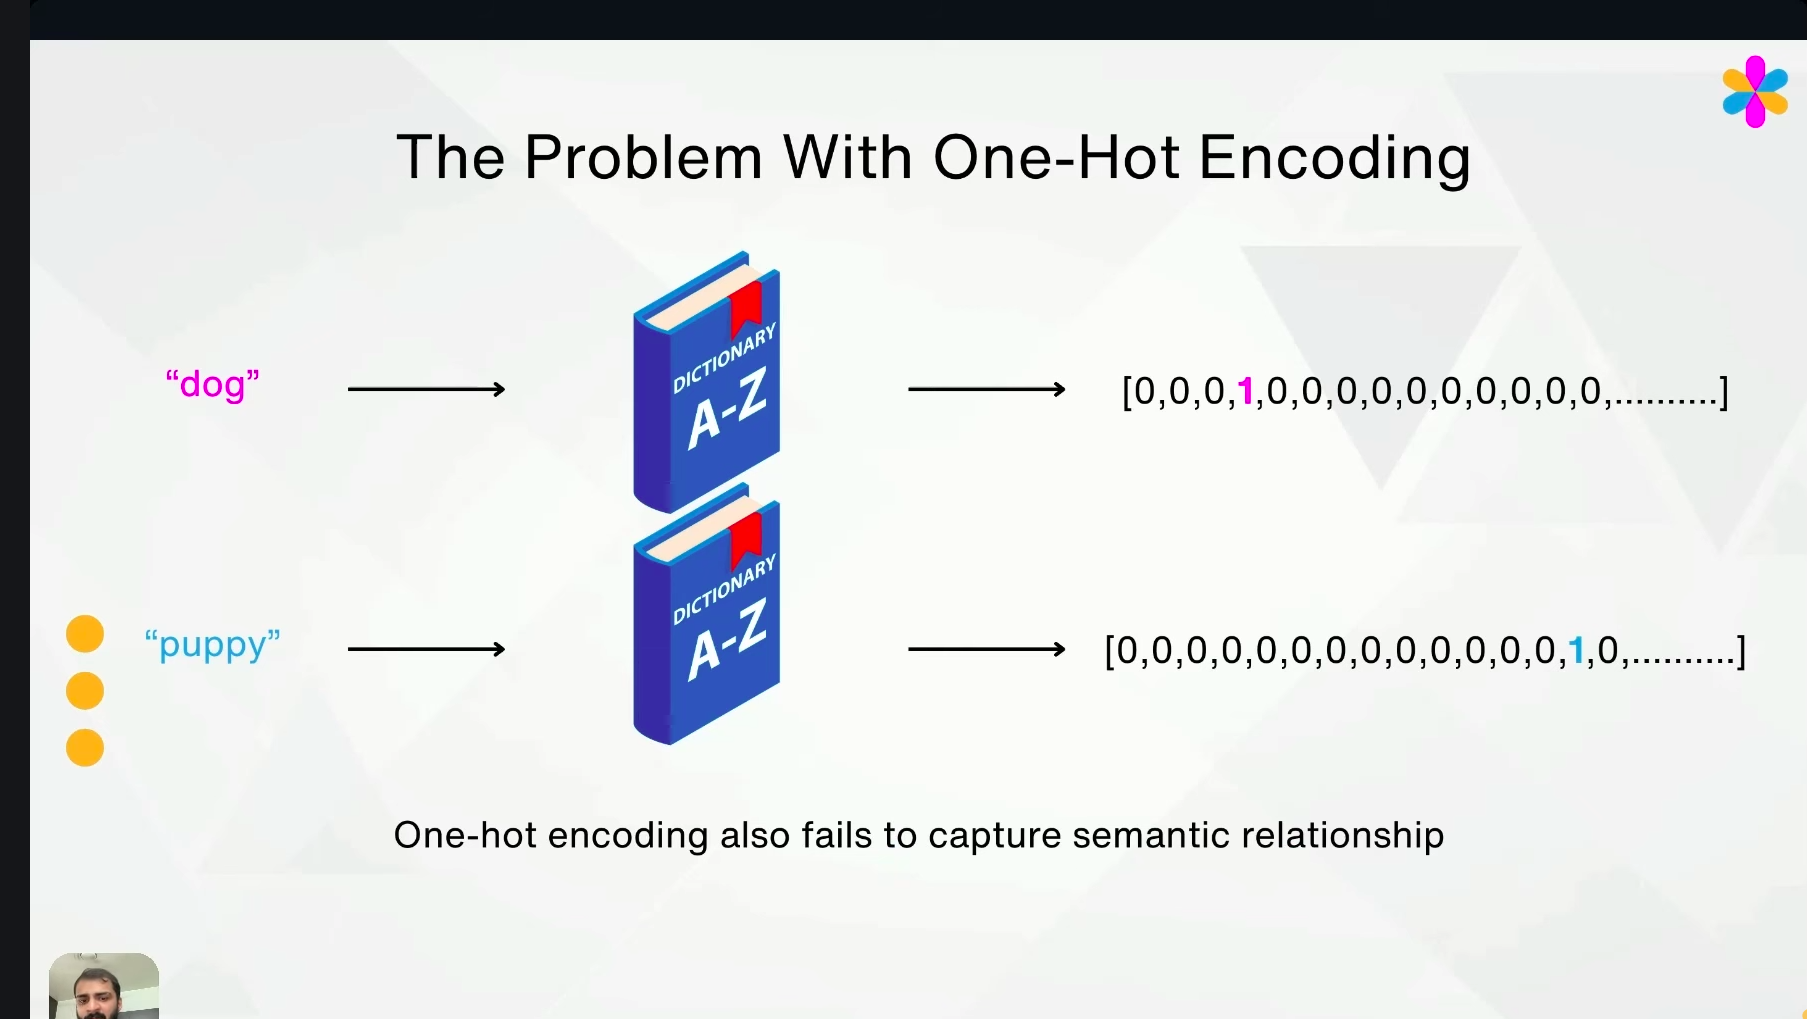

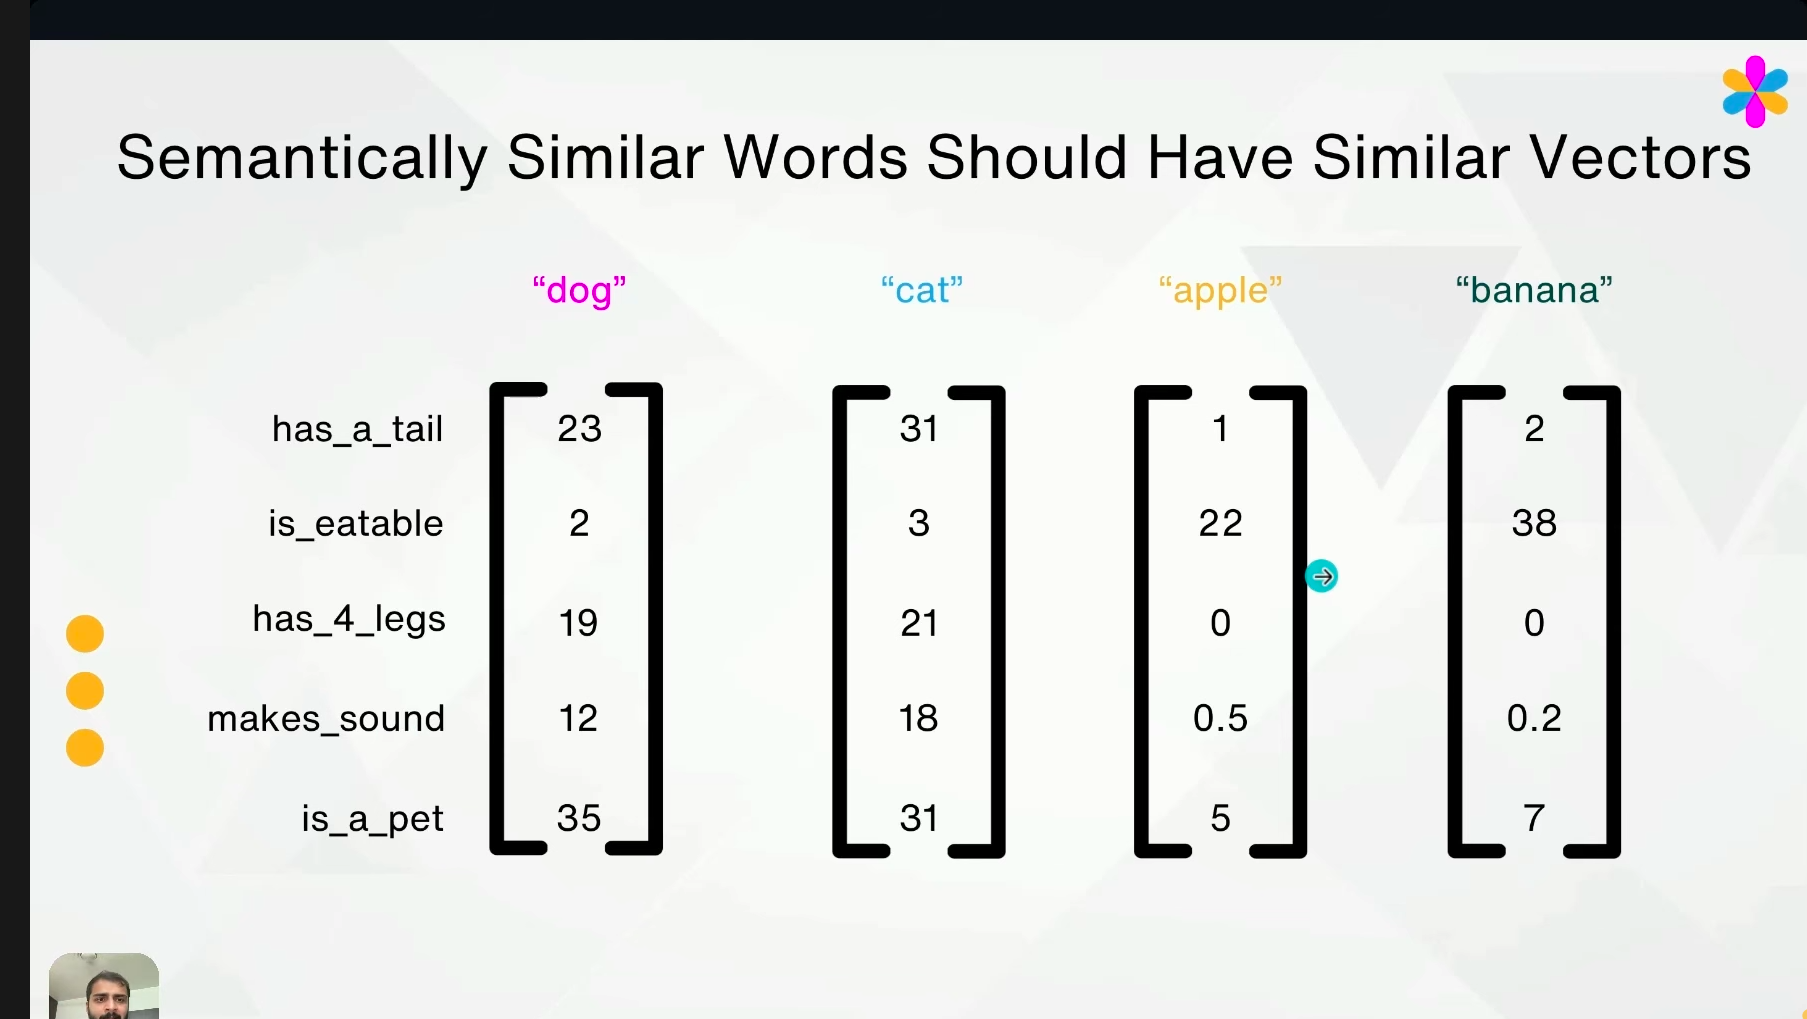

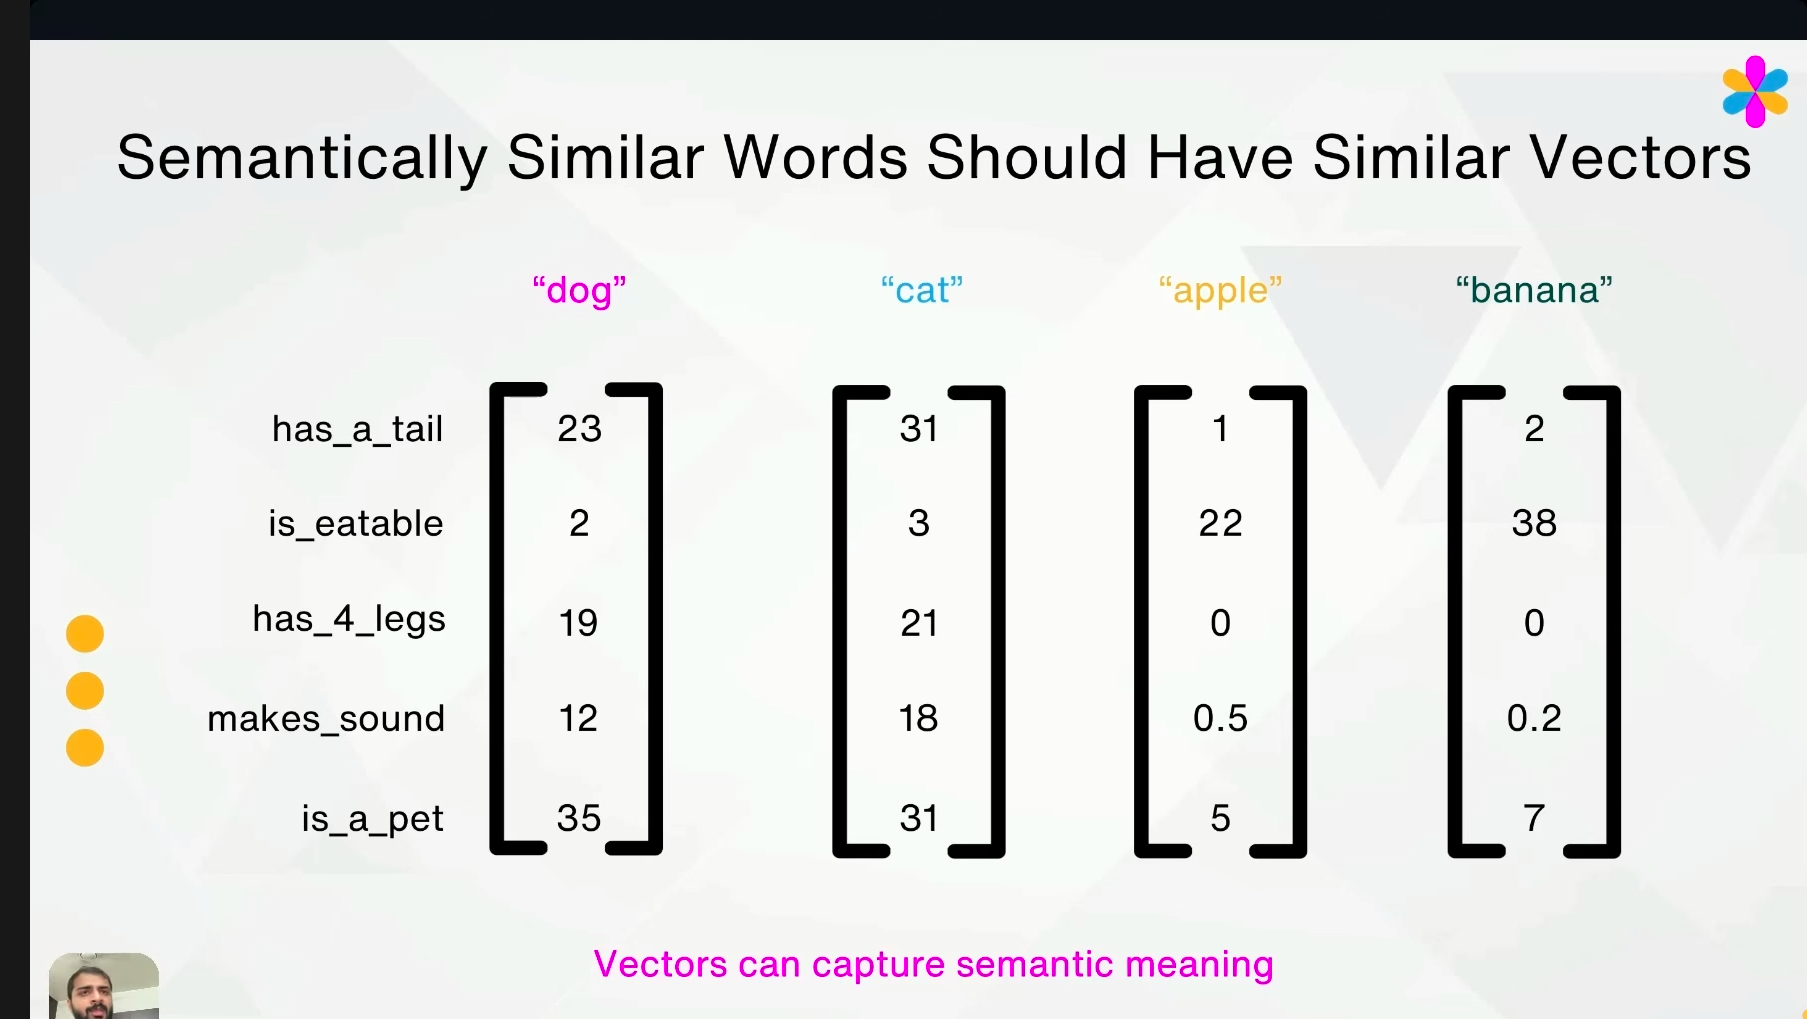

# Import trained model

In [ ]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")  # download the model and return as object ready for use

[==================================================] 100.0% 1662.8/1662.8MB downloaded


# Example of a word as a vector

In [ ]:
word_vectors=model

# Let us look how the vector embedding of a word looks like
print(word_vectors['computer'])  # Example: Accessing the vector for the word 'computer'

[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  5.51757812e-02  5.02929

In [ ]:
print(word_vectors['cat'].shape)

(300,)


# Similar words

# King + Woman - Man = ?

In [ ]:
# Example of using most_similar
print(word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=10))

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593831062317), ('monarchy', 0.5087411999702454)]


# Let us check the similarity b/w a few pair of words

In [ ]:
# Example of calculating similarity
print(word_vectors.similarity('woman', 'man'))
print(word_vectors.similarity('king', 'queen'))
print(word_vectors.similarity('uncle', 'aunt'))
print(word_vectors.similarity('boy', 'girl'))
print(word_vectors.similarity('nephew', 'niece'))
print(word_vectors.similarity('paper', 'water'))

0.76640123
0.6510957
0.7643474
0.8543272
0.7594367
0.11408084


# Most similar words

In [ ]:
print(word_vectors.most_similar("tower", topn=5))

# Now let us see the vector similarity

In [ ]:
import numpy as np
# Words to compare
word1 = 'man'
word2 = 'woman'

word3 = 'semiconductor'
word4 = 'earthworm'

word5 = 'nephew'
word6 = 'niece'

# Calculate the vector difference
vector_difference1 = model[word1] - model[word2]
vector_difference2 = model[word3] - model[word4]
vector_difference3 = model[word5] - model[word6]

# Calculate the magnitude of the vector difference
magnitude_of_difference1 = np.linalg.norm(vector_difference1)
magnitude_of_difference2 = np.linalg.norm(vector_difference2)
magnitude_of_difference3 = np.linalg.norm(vector_difference3)


# Print the magnitude of the difference
print("The magnitude of the difference between '{}' and '{}' is {:.2f}".format(word1, word2, magnitude_of_difference1))
print("The magnitude of the difference between '{}' and '{}' is {:.2f}".format(word3, word4, magnitude_of_difference2))
print("The magnitude of the difference between '{}' and '{}' is {:.2f}".format(word5, word6, magnitude_of_difference3))

The magnitude of the difference between 'man' and 'woman' is 1.73
The magnitude of the difference between 'semiconductor' and 'earthworm' is 5.67
The magnitude of the difference between 'nephew' and 'niece' is 1.96
